-------
---
Waste Classification for Smart Bins using CNN
-------
------
----

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
import os
from keras.utils import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_path = "D:/DBDA/PROJECT-02/Google/training/"
test_path = "D:/DBDA/PROJECT-02/Google/testing/"

------------
--------
Remove Dodgy Images
--------
-------

In [4]:
image_exts = ['jpeg','jpg','png','bmp']

---------
Total number of Categories:

--------

In [5]:

len(os.listdir(test_path))

29

In [6]:
len(os.listdir(train_path))

29

In [7]:
#removing all other images which does not exist in image_exts

for waste_cat in os.listdir(train_path):
    for image in os.listdir(os.path.join(train_path, waste_cat)):
        image_path = os.path.join(train_path,waste_cat,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list D:/DBDA/PROJECT-02/Google/training/AEROSOL CANS\Aerosol-Spray-Paint.jpg
Image not in ext list D:/DBDA/PROJECT-02/Google/training/AEROSOL CANS\crosslink_paints_12oz_aerosol_spray_can_v11.jpg
Image not in ext list D:/DBDA/PROJECT-02/Google/training/AEROSOL CANS\IMG_1509-OriginalFile.JPG.jpg
Image not in ext list D:/DBDA/PROJECT-02/Google/training/AEROSOL CANS\NG0GV.jpg
Image not in ext list D:/DBDA/PROJECT-02/Google/training/AEROSOL CANS\Post-Featured-Image-Aerosol-Cans.jpg
Image not in ext list D:/DBDA/PROJECT-02/Google/training/aluminum food cans\01-2-1024x683.jpg
Image not in ext list D:/DBDA/PROJECT-02/Google/training/aluminum soda cans\attachment-RS51367_GettyImages-1334749219.jpg
Image not in ext list D:/DBDA/PROJECT-02/Google/training/aluminum soda cans\MPE20-20Can20Logistics20benefits.jpg
Image not in ext list D:/DBDA/PROJECT-02/Google/training/Cardboard boxes\Corrugated-Boxes.gif
Image not in ext list D:/DBDA/PROJECT-02/Google/training/Cardboard boxes\csm_f

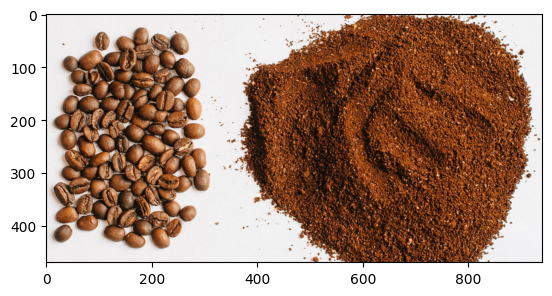

In [8]:
img  = load_img(train_path + "COFFEE GROUND/ground.png")
plt.imshow(img)
plt.show()

In [9]:
imgA = img_to_array(img)
print(imgA.shape)

(470, 940, 3)


----------
Building model for Image Classification

--------

In [20]:
# Load the pre-trained MobileNetV2 model without the top layer (output layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensionality
x = Dense(512, activation='relu')(x)  # Dense layer
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
predictions = Dense(29, activation='softmax')(x)  # Final output layer for 29 classes

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
print(model.summary())

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 64, 64, 32)        │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 64, 64, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 64, 64, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 64, 64, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 64, 64, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 64, 64, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 64, 64, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 64, 64, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 64, 64, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 64, 64, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 64, 64, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 65, 65, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 32, 32, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,928,733 (11.17 MB)

 Trainable params: 670,749 (2.56 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


-----------
Training Dataset

-------

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(128, 128), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(128, 128), batch_size=32, class_mode='categorical')

# Train the model
history = model.fit(train_generator, validation_data=test_generator, epochs=20)

# Save the model
model.save('waste_classifier_mobilenet.h5')

Found 20679 images belonging to 29 classes.
Found 5207 images belonging to 29 classes.
Epoch 1/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 556s 848ms/step - accuracy: 0.4596 - loss: 1.9571 - val_accuracy: 0.6564 - val_loss: 1.1138
Epoch 2/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 404s 622ms/step - accuracy: 0.6382 - loss: 1.1991 - val_accuracy: 0.6800 - val_loss: 1.0494
Epoch 3/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 421s 646ms/step - accuracy: 0.6649 - loss: 1.0887 - val_accuracy: 0.6975 - val_loss: 1.0154
Epoch 4/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 413s 633ms/step - accuracy: 0.6998 - loss: 0.9828 - val_accuracy: 0.6989 - val_loss: 0.9953
Epoch 5/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 416s 639ms/step - accuracy: 0.7071 - loss: 0.9367 - val_accuracy: 0.6895 - val_loss: 1.0243
Epoch 6/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 452s 694ms/step - accuracy: 0.7194 - loss: 0.8906 - val_accuracy: 0.7025 - val_loss: 1.0191
Epoch 7/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 424s 649ms/step - accuracy: 0.7285 - loss: 0.8499 - val_accuracy: 0.7077 - val_lo

----------
CONCLUSIONS:
1. The model gave an accuracy of 81.38
2. Saving model as waste_classifier_mobilenet.h5

--------

----------
Testing model

-----

In [6]:
model= tf.keras.models.load_model("D:/DBDA/PROJECT-02/waste_classifier_mobilenet.h5")

In [7]:
source_folder = "D:/DBDA/PROJECT-02/Google/testing"
categorires = os.listdir(source_folder)
categorires.sort()
print(categorires)

['AEROSOL CANS', 'ALUMINUM FOOD CAN', 'ALUMINUM SODA CAN', 'CARDBOARD BOX', 'CLOTHES', 'COFFEE GROUND', 'DISPOSABLE PLASTIC CUTLERY', 'EGGSHELL', 'FOOD WASTE', 'GLASS BEVERAGE BOTTLE', 'GLASS COSMETIC CONTAINERS', 'GLASS FOOD JAR', 'MAGAZINES', 'NEWSPAPER', 'OFFICE PAPER', 'PAPER CUP', 'PLASTIC CUP LID', 'PLASTIC DETERGENT BOTTLE', 'PLASTIC FOOD CONTAINER', 'PLASTIC SHOPPING BAG', 'PLASTIC SODA BOTTLE', 'PLASTIC STRAW', 'PLASTIC TRASH BAG', 'PLASTIC WATER BOTTLE', 'SHOES', 'STEEL FOOD CANS', 'STYROFORM CUPS', 'STYROFORM FOOD CONTAINERS', 'TEA BAGS']


--------
TEST-01

--------

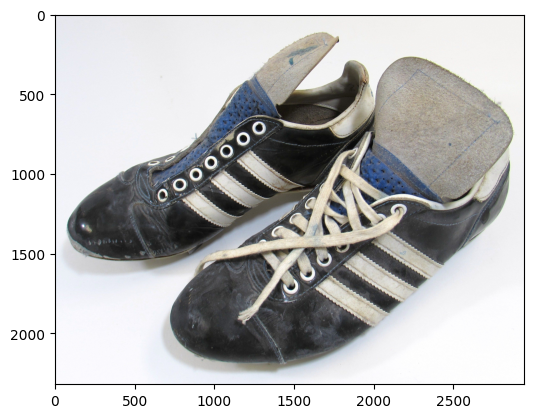

In [8]:
img  = load_img("test3.jpg")
plt.imshow(img)
plt.show()

----------
Creating a function to predict the category

---------

In [9]:
def prepareImage(pathforimage):
    image = load_img(pathforimage, target_size=(128,128))
    imgresult = img_to_array(image)
    imgresult = np.expand_dims(imgresult, axis=0)
    imgresult = imgresult/255.
    return imgresult

In [10]:
testimagepath = "D:/DBDA/PROJECT-02/test3.jpg"
imageformodel = prepareImage(testimagepath)

resultarray = model.predict(imageformodel, verbose=1)
answers = np.argmax(resultarray, axis =1)
print(answers[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
24


-------
Image which is uploaded for testing gets predicted to which category it belongs to

------

In [11]:
text = categorires[answers[0]]
print("predicted Image::"+text)

predicted Image::SHOES


---------
TEST-02

-------

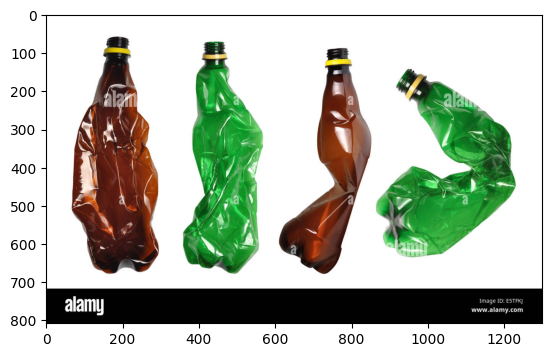

In [12]:
img  = load_img("plastic_bottle.jpg")
plt.imshow(img)
plt.show()

In [13]:
testimagepath = "D:/DBDA/PROJECT-02/plastic_bottle.jpg"
imageformodel = prepareImage(testimagepath)

resultarray = model.predict(imageformodel, verbose=1)
answers = np.argmax(resultarray, axis =1)
print(answers[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
20


In [14]:
text = categorires[answers[0]]
print("predicted Image::"+text)

predicted Image::PLASTIC SODA BOTTLE


-----------------
------
----------